# Figures S19

This notebook loads the data and produces figure S19.

In [1]:
savedate = '20251031'

In [2]:
data_path = '' # path to data
dac_path = '' # path to secondary data

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as ppt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Read data

In [4]:
# Load data
df_ct_level = pd.read_csv(data_path + '23_level_CT_US_imputedquantiles_20250722.zip',dtype={'GEOID':str,'STATEFP':str,'COUNTYFP':str,'BGFIPS':str},index_col=0)
df_ct_level['STATEFP'] = df_ct_level['STATEFP'].str.zfill(2)
df_ct_level['COUNTYFP'] = df_ct_level['COUNTYFP'].str.zfill(5)

# Downloaded from EPA
disadv_comms = pd.read_csv(dac_path + '1.0-communities.csv')

/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_40440/2596531660.py:7: DtypeWarning: Columns (18,26,70,72,85,131) have mixed types. Specify dtype option on import or set low_memory=False.
  disadv_comms = pd.read_csv(dac_path + '1.0-communities.csv')


# IRA Criteria

In [5]:
# Fill missing column
disadv_comms.loc[:, 'Greater than or equal to the 90th percentile for lack of indoor plumbing and is low income?'] = False
disadv_comms.loc[disadv_comms.loc[(disadv_comms['Share of homes with no kitchen or indoor plumbing (percentile)']>=0.9)&(disadv_comms['Is low income?'])].index, 'Greater than or equal to the 90th percentile for lack of indoor plumbing and is low income?'] = True

In [6]:
# Aggregate criteria into higher level "climate", "energy", "health", "housing", "pollution", "transportation", "water", and "workforce" buckets
cols_climate_change = ['Greater than or equal to the 90th percentile for expected agriculture loss rate and is low income?',
              'Greater than or equal to the 90th percentile for expected building loss rate and is low income?',
              'Greater than or equal to the 90th percentile for expected population loss rate and is low income?',
              'Greater than or equal to the 90th percentile for share of properties at risk of flood in 30 years and is low income?',
              'Greater than or equal to the 90th percentile for share of properties at risk of fire in 30 years and is low income?']

cols_energy = ['Greater than or equal to the 90th percentile for energy burden and is low income?',
              'Greater than or equal to the 90th percentile for PM2.5 exposure and is low income?']

cols_health = ['Greater than or equal to the 90th percentile for asthma and is low income?',
              'Greater than or equal to the 90th percentile for diabetes and is low income?',
              'Greater than or equal to the 90th percentile for heart disease and is low income?',
              'Greater than or equal to the 90th percentile for low life expectancy and is low income?']

cols_housing = ['Tract experienced historic underinvestment and remains low income',
                'Greater than or equal to the 90th percentile for housing burden and is low income?',
                'Greater than or equal to the 90th percentile for lack of indoor plumbing and is low income?',
                'Greater than or equal to the 90th percentile for lead paint, the median house value is less than 90th percentile and is low income?',
                "Greater than or equal to the 90th percentile for share of the tract's land area that is covered by impervious surface or cropland as a percent and is low income?"]

cols_pollution = ['Greater than or equal to the 90th percentile for proximity to hazardous waste facilities and is low income?',
              'Greater than or equal to the 90th percentile for proximity to superfund sites and is low income?',
              'Greater than or equal to the 90th percentile for proximity to RMP sites and is low income?',
              'There is at least one abandoned mine in this census tract and the tract is low income.',
              'There is at least one Formerly Used Defense Site (FUDS) in the tract and the tract is low income.']

cols_transportation = ['Greater than or equal to the 90th percentile for diesel particulate matter and is low income?',
              'Greater than or equal to the 90th percentile for traffic proximity and is low income?',
              'Greater than or equal to the 90th percentile for DOT transit barriers and is low income?']

cols_water = ['Greater than or equal to the 90th percentile for wastewater discharge and is low income?',
              'Greater than or equal to the 90th percentile for leaky underground storage tanks and is low income?']

cols_workforce = ['Greater than or equal to the 90th percentile for low median household income as a percent of area median income and has low HS attainment?',
              'Greater than or equal to the 90th percentile for households in linguistic isolation and has low HS attainment?',
              'Greater than or equal to the 90th percentile for unemployment and has low HS attainment?',
              'Greater than or equal to the 90th percentile for households at or below 100% federal poverty level and has low HS attainment?']

cols_tribal = ['Identified as disadvantaged due to tribal overlap']

cols_neighbors = ['Identified as disadvantaged based on neighbors and relaxed low income threshold only']

# Aggregate
namelist = []
for name, idx in {'climate_change':cols_climate_change,
                  'energy':cols_energy,
                  'health':cols_health,
                  'housing':cols_housing,
                  'pollution':cols_pollution,
                  'transportation':cols_transportation,
                  'water':cols_water,
                  'workforce':cols_workforce,
                  'tribal':cols_tribal,
                  'neighbors':cols_neighbors}.items():
    disadv_comms[name+'_criteria'] = disadv_comms.loc[:, idx].sum(axis=1)
    namelist += [name]
    
# Qualified by any criteria
disadv_comms.loc[:, 'any_criteria'] = np.clip(disadv_comms.loc[:, [name+'_criteria' for name in namelist]].sum(axis=1).values, 0, 1)

In [7]:
# Merge with CT-level data set
cols_keep = ['Census tract 2010 ID', 'climate_change_criteria', 'energy_criteria', 'health_criteria',
             'housing_criteria', 'pollution_criteria', 'transportation_criteria', 'water_criteria',
             'workforce_criteria', 'tribal_criteria', 'neighbors_criteria',
             'Total threshold criteria exceeded', 'Total categories exceeded',
             'Identified as disadvantaged without considering neighbors', 
             'Identified as disadvantaged based on neighbors and relaxed low income threshold only', 
             'Identified as disadvantaged due to tribal overlap', 
             'Identified as disadvantaged',
             'Share of neighbors that are identified as disadvantaged', 
             'Is low income?']

ct_disadv_df = df_ct_level.loc[:, ['TRACTFP', 'no_stations']].merge(disadv_comms.loc[:, cols_keep].rename(columns={'Census tract 2010 ID':'TRACTFP'}), on='TRACTFP')

# Plot

/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_40440/78078151.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels([nice_names[key] for key in tmp1.index],fontsize=10, rotation=30, ha='right')


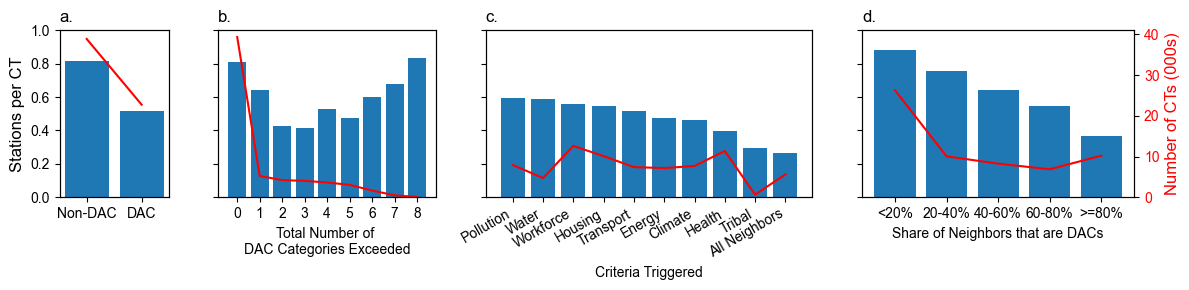

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), width_ratios=[1,2,3,2.5], sharey=True)

nice_names = {'climate_change':'Climate', 'energy':'Energy', 'health':'Health', 'housing':'Housing',
              'pollution':'Pollution', 'transportation':'Transport', 'water':'Water',
              'workforce':'Workforce', 'tribal':'Tribal', 'neighbors':'All Neighbors'}

axes[0].bar([0, 1], [ct_disadv_df.loc[(ct_disadv_df['Identified as disadvantaged']==k)]['no_stations'].sum() / len(ct_disadv_df.loc[(ct_disadv_df['Identified as disadvantaged']==k)]) for k in [False, True]])
axes[0].set_xticks([0, 1], labels=['Non-DAC', 'DAC'])
ax0 = axes[0].twinx()
ax0.plot([0, 1], [len(ct_disadv_df.loc[(ct_disadv_df['Identified as disadvantaged']==k)]) for k in [False, True]], color='red')

axes[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes[0].set_ylim([0, 1])

# ct_disadv_df['Total categories exceeded'].max() == 8
axes[1].bar(range(9), [ct_disadv_df.loc[(ct_disadv_df['Total categories exceeded']==k)]['no_stations'].sum() / len(ct_disadv_df.loc[(ct_disadv_df['Total categories exceeded']==k)]) for k in range(9)])
ax2 = axes[1].twinx()
ax2.plot(range(9), [len(ct_disadv_df.loc[(ct_disadv_df['Total categories exceeded']==k)]) for k in range(9)], color='red')
axes[1].set_xticks(range(9))
axes[1].set_xlabel('Total Number of \nDAC Categories Exceeded', fontsize=10)

tmp1 = pd.DataFrame({name:ct_disadv_df.loc[(ct_disadv_df[name+'_criteria']>0)]['no_stations'].sum() / len(ct_disadv_df.loc[(ct_disadv_df[name+'_criteria']>0)]) for name in namelist}, index=['Stations per CT']).T.sort_values(by='Stations per CT', ascending=False)
axes[2].bar(tmp1.index, tmp1['Stations per CT'].values)
ax3 = axes[2].twinx()
ax3.plot(range(len(tmp1)), [len(ct_disadv_df.loc[(ct_disadv_df[name+'_criteria']>0)]) for name in tmp1.index], color='red')
axes[2].set_xticklabels([nice_names[key] for key in tmp1.index],fontsize=10, rotation=30, ha='right')


col2 = 'Share of neighbors that are identified as disadvantaged'
tmp2 = pd.DataFrame({'<20%':ct_disadv_df.loc[(ct_disadv_df[col2]>=0)&(ct_disadv_df[col2]<20)]['no_stations'].sum() / len(ct_disadv_df.loc[(ct_disadv_df[col2]>=0)&(ct_disadv_df[col2]<20)]),
                     '20-40%':ct_disadv_df.loc[(ct_disadv_df[col2]>=20)&(ct_disadv_df[col2]<40)]['no_stations'].sum() / len(ct_disadv_df.loc[(ct_disadv_df[col2]>=20)&(ct_disadv_df[col2]<40)]),
                     '40-60%':ct_disadv_df.loc[(ct_disadv_df[col2]>=40)&(ct_disadv_df[col2]<60)]['no_stations'].sum() / len(ct_disadv_df.loc[(ct_disadv_df[col2]>=40)&(ct_disadv_df[col2]<60)]),
                     '60-80%':ct_disadv_df.loc[(ct_disadv_df[col2]>=60)&(ct_disadv_df[col2]<80)]['no_stations'].sum() / len(ct_disadv_df.loc[(ct_disadv_df[col2]>=60)&(ct_disadv_df[col2]<80)]),
                     '>=80%':ct_disadv_df.loc[(ct_disadv_df[col2]>=80)]['no_stations'].sum() / len(ct_disadv_df.loc[(ct_disadv_df[col2]>=80)]),
                    }, index=['Stations per CT']).T

tmp2_cts = pd.DataFrame({'<20%':len(ct_disadv_df.loc[(ct_disadv_df[col2]>=0)&(ct_disadv_df[col2]<20)]),
                     '20-40%':len(ct_disadv_df.loc[(ct_disadv_df[col2]>=20)&(ct_disadv_df[col2]<40)]),
                     '40-60%':len(ct_disadv_df.loc[(ct_disadv_df[col2]>=40)&(ct_disadv_df[col2]<60)]),
                     '60-80%':len(ct_disadv_df.loc[(ct_disadv_df[col2]>=60)&(ct_disadv_df[col2]<80)]),
                     '>=80%':len(ct_disadv_df.loc[(ct_disadv_df[col2]>=80)]),
                    }, index=['Num CTs']).T

axes[3].bar(tmp2.index, tmp2['Stations per CT'])
ax4 = axes[3].twinx()
ax4.plot(tmp2_cts.index, tmp2_cts['Num CTs'], color='red')


axes[2].set_xlabel('Criteria Triggered', fontsize=10)
axes[3].set_xlabel('Share of Neighbors that are DACs', fontsize=10)

axes[0].set_ylabel('Stations per CT', fontsize=12)

ax0.set_ylim([0, 41000])
ax2.set_ylim([0, 41000])
ax3.set_ylim([0, 41000])
ax4.set_ylim([0, 41000])

axes[0].set_title('a.', loc='left')
axes[1].set_title('b.', loc='left')
axes[2].set_title('c.', loc='left')
axes[3].set_title('d.', loc='left')

ax0.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([0, 10000, 20000, 30000, 40000])
ax4.set_yticklabels([0, 10, 20, 30, 40], color='red')
ax4.set_ylabel('Number of CTs (000s)', color='red', fontsize=12)
plt.tight_layout()
plt.savefig('Figures/figS19_iracriteria_stations_'+savedate+'.pdf', bbox_inches='tight')
plt.show()

In [9]:
ct_disadv_df.loc[:, ['TRACTFP', 'Identified as disadvantaged', 'Share of neighbors that are identified as disadvantaged', 'Identified as disadvantaged based on neighbors and relaxed low income threshold only']].to_csv(dac_path + 'ira_neighbours_info.csv')